## Avocado: Linear Regression Example

In [2]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from math import sqrt
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [3]:
df = pd.read_csv('../data/avocado.csv')
df.shape

(18249, 14)

In [4]:
df.head(2).T

,0,1
Unnamed: 0,0,1
Date,2015-12-27,2015-12-20
AveragePrice,1.33,1.35
Total Volume,64236.62,54876.98
4046,1036.74,674.28
4225,54454.85,44638.81
4770,48.16,58.33
Total Bags,8696.87,9505.56
Small Bags,8603.62,9408.07
Large Bags,93.25,97.49


## Exploratory data analysis

In [5]:
# target
print(df['AveragePrice'].describe())

count    18249.000000
mean         1.405978
std          0.402677
min          0.440000
25%          1.100000
50%          1.370000
75%          1.660000
max          3.250000
Name: AveragePrice, dtype: float64


In [6]:
# remove extreme outliers
print(df.shape[0])
cutpoint = df['AveragePrice'].mean()+3* df['AveragePrice'].std()
print(cutpoint)
df=df[df['AveragePrice']<=cutpoint].copy()
print(df.shape[0])

18249
2.6140080762625297
18118


In [9]:
print(df['region'].describe())

count      18118
unique        54
top       Albany
freq         338
Name: region, dtype: object


In [80]:
countries=df['region'].unique()
countries

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

In [90]:
scountries =  df['region'].sample(5)
scountries

15539     GreatLakes
8299           Tampa
15483    GrandRapids
2691         TotalUS
11951         Albany
Name: region, dtype: object

In [101]:
df = df[df['region'].isin(['Albany','Spokane','SanFrancisco'])]

In [102]:
countries=['Albany','Spokane','SanFrancisco']

In [103]:
reg_onehot=pd.get_dummies(pd.DataFrame(countries,columns=["Region"]),prefix='Region')
reg_onehot

,Region_Albany,Region_SanFrancisco,Region_Spokane
0,1,0,0
1,0,0,1
2,0,1,0


In [104]:
al=pd.get_dummies(df['region'])
al

,Albany,SanFrancisco,Spokane
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
18172,0,0,1
18173,0,0,1
18174,0,0,1
18175,0,0,1


In [37]:
build_dict = lambda test_keys, test_values : {test_keys[i]: test_values[i] for i in range(len(test_keys))}
prefix_column = lambda colist, prefix : [prefix + i for i in colist]



In [105]:
pcols=prefix_column(al.columns,'Region'+".")

In [106]:
d=build_dict(al.columns,pcols)
d

{'Albany': 'Region.Albany',
 'SanFrancisco': 'Region.SanFrancisco',
 'Spokane': 'Region.Spokane'}

In [107]:
al.rename(columns=d,inplace=True)

In [108]:
al

,Region.Albany,Region.SanFrancisco,Region.Spokane
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
18172,0,0,1
18173,0,0,1
18174,0,0,1
18175,0,0,1


In [67]:
bal=al.copy()
bal

,Region.Detroit,Region.Jacksonville,Region.LasVegas,Region.Louisville,Region.SanFrancisco
13131,0,0,0,1,0
3535,1,0,0,0,0
11360,0,0,0,0,1
3928,0,0,1,0,0
3896,0,1,0,0,0


In [77]:
bal[bal.columns[1:]].apply(lambda x:  x,axis=1)

,Region.Jacksonville,Region.LasVegas,Region.Louisville,Region.SanFrancisco
13131,0,0,1,0
3535,0,0,0,0
11360,0,0,0,1
3928,0,1,0,0
3896,1,0,0,0


In [109]:
ef=pd.concat([df,al],axis='columns')

In [110]:
ef.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Region.Albany,Region.SanFrancisco,Region.Spokane
count,967.000000,967.000000,9.670000e+02,967.000000,9.670000e+02,967.000000,967.000000,967.000000,967.000000,967.000000,967.000000,967.000000,967.000000,967.000000
mean,24.453981,1.545119,1.724653e+05,39985.871861,1.038115e+05,4120.477735,24547.428242,22790.804209,1485.438594,271.186474,2016.142709,0.349535,0.311272,0.339193
std,15.606500,0.415186,2.942089e+05,77328.330383,1.851570e+05,11154.572723,33557.546518,32730.850059,3812.297437,830.596872,0.944805,0.477070,0.463253,0.473681
min,0.000000,0.740000,7.742000e+02,0.000000,3.053000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,2015.000000,0.000000,0.000000,0.000000
25%,10.000000,1.200000,3.628005e+03,272.365000,1.459720e+03,0.000000,1575.205000,951.450000,0.000000,0.000000,2015.000000,0.000000,0.000000,0.000000
50%,24.000000,1.520000,5.597978e+04,2897.410000,2.168672e+04,33.880000,8625.920000,6178.940000,197.690000,0.000000,2016.000000,0.000000,0.000000,0.000000
75%,38.000000,1.830000,1.077141e+05,24696.035000,7.635084e+04,2190.650000,41762.070000,35469.495000,1012.120000,32.265000,2017.000000,1.000000,1.000000,1.000000
max,52.000000,2.590000,1.706251e+06,560686.250000,1.113988e+06,76966.690000,236417.930000,231913.110000,43887.360000,10906.940000,2018.000000,1.000000,1.000000,1.000000


In [112]:
aaa=ef[ef['Region.SanFrancisco']==1]
aaa.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Region.Albany,Region.SanFrancisco,Region.Spokane
2184,0,2015-12-27,1.05,692206.40,181704.67,422617.80,28184.73,59699.20,59094.49,582.90,21.81,conventional,2015,SanFrancisco,0,1,0
2185,1,2015-12-20,1.15,637091.48,173521.67,364622.31,33083.99,65863.51,65038.10,766.09,59.32,conventional,2015,SanFrancisco,0,1,0
2186,2,2015-12-13,1.22,616016.46,127080.03,384958.63,34069.96,69907.84,69022.62,781.91,103.31,conventional,2015,SanFrancisco,0,1,0
2187,3,2015-12-06,1.06,694982.49,102771.75,498975.34,37321.12,55914.28,55171.77,638.89,103.62,conventional,2015,SanFrancisco,0,1,0
2188,4,2015-11-29,1.05,651638.60,102783.08,462966.47,31195.04,54694.01,53992.69,647.78,53.54,conventional,2015,SanFrancisco,0,1,0


In [118]:
ef['Year'] = ef['Date'].apply(lambda x: int(x.split('-')[0]))

In [183]:
ef['Month'] = ef['Date'].apply(lambda x: int(x.split('-')[1]))

In [184]:
ef['Month'].describe()

count    967.000000
mean       6.096174
std        3.549714
min        1.000000
25%        3.000000
50%        6.000000
75%        9.000000
max       12.000000
Name: Month, dtype: float64

In [119]:
ef['Year'].describe()

count     967.000000
mean     2016.142709
std         0.944805
min      2015.000000
25%      2015.000000
50%      2016.000000
75%      2017.000000
max      2018.000000
Name: Year, dtype: float64

In [120]:
ef['AveragePrice'].describe()

count    967.000000
mean       1.545119
std        0.415186
min        0.740000
25%        1.200000
50%        1.520000
75%        1.830000
max        2.590000
Name: AveragePrice, dtype: float64

In [ ]:
ef['Total Volume'].describe()

In [124]:
ef['Type.organic'] = np.where(ef['type']=='organic', 1,0)
ef['Type.conventional'] = np.where(ef['type']=='organic', 0,1)

In [126]:
ef['Type.conventional'].describe()

count    967.000000
mean       0.524302
std        0.499667
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: Type.conventional, dtype: float64

In [173]:
# confirm no missing data
ef[['AveragePrice','Year','Type.organic','Type.conventional','Region.SanFrancisco','Region.Albany','Region.Spokane','Total Volume']].isnull().sum()

AveragePrice           0
Year                   0
Type.organic           0
Type.conventional      0
Region.SanFrancisco    0
Region.Albany          0
Region.Spokane         0
Total Volume           0
dtype: int64

In [172]:
# confirm all numerical
ef[['AveragePrice','Year','Type.organic','Type.conventional','Region.SanFrancisco','Region.Albany','Region.Spokane']].dtypes



AveragePrice           float64
Year                     int64
Type.organic             int64
Type.conventional        int64
Region.SanFrancisco      uint8
Region.Albany            uint8
Region.Spokane           uint8
dtype: object

## Model Building

In [226]:
# declare features and target
features = ['Year','Type.organic','Type.conventional','Region.SanFrancisco','Region.Albany','Region.Spokane','Total Volume']

features = ['Year','Month','Type.organic','Type.conventional','Region.SanFrancisco','Region.Albany','Region.Spokane']


y = ef['AveragePrice']
X = ef[features]
print(y.shape, X.shape)

(967,) (967, 7)


In [227]:
# train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25, random_state=12)

In [228]:
# Fit the model to the training dataset
mymodel = LinearRegression()
mymodel.fit(X_train, y_train)

LinearRegression()

In [229]:
# coefficients and intercept
mymodel.intercept_
mymodel.coef_

array([ 6.92734372e-02,  2.56522884e-02,  2.79995986e-01, -2.79995986e-01,
        1.47019469e-01,  1.87042231e-04, -1.47206512e-01])

In [249]:
# what is the equation for this model?
cols=list(X.columns)
coefs=list(mymodel.coef_)
xcoefs = [(coefs[i], cols[i]) for i in range(0, len(cols))]
equation = f'y = {round(mymodel.intercept_,4)} + {round(xcoefs[0][0],4)}*{xcoefs[0][1]} + {round(xcoefs[1][0],4)}*{xcoefs[1][1]} + {round(xcoefs[2][0],4)}*{xcoefs[2][1]} + {round(xcoefs[3][0],4)}*{xcoefs[3][1]}+ {round(xcoefs[4][0],4)}*{xcoefs[4][1]}+ {round(xcoefs[5][0],4)}*{xcoefs[5][1]} +{round(xcoefs[6][0],4)}*{xcoefs[6][1]}'.replace('Type.o','TypeO').replace('Type.c','TypeC').replace('Region.','Region')
print("Regression Equation: ", equation)  

Regression Equation:  y = -138.26 + 0.0693*Year + 0.0257*Month + 0.28*TypeOrganic + -0.28*TypeConventional+ 0.147*RegionSanFrancisco+ 0.0002*RegionAlbany +-0.1472*RegionSpokane


In [238]:
# Predict the y-values on the testing dataset & examine the first few
y_preds = [x for x in mymodel.predict(X_test)]
print(list(y_test[:5]))
print(y_preds[:5])

[1.66, 1.23, 1.08, 1.33, 2.33]
[1.880624621952478, 1.3571724962738188, 1.3539683668193447, 1.2245436734872044, 1.9248478955713324]


## Model Evaluation

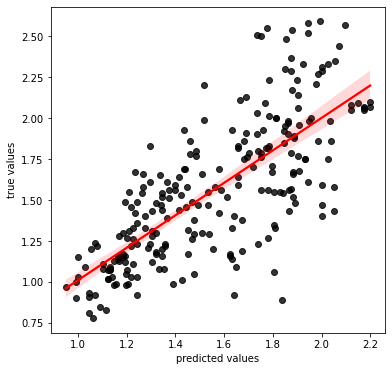

In [239]:
# compare predictions to known values
plt.figure(figsize=(6,6))
ax = sns.regplot(x = y_preds, 
                 y = y_test, 
                 scatter_kws={"color": "black"}, 
                 line_kws={"color": "red"})
ax.set(xlabel='predicted values', ylabel='true values');

In [240]:
# R-2 (coefficient of determination)
r2 = metrics.r2_score(y_test, y_preds)
round(r2, 2)

0.56

In [241]:
# root mean sq error
rmse = sqrt(metrics.mean_squared_error(y_test, y_preds))
rmse

0.2856840722253296

In [242]:
# is that more or less than if we just used the average as our model?
avg_val = y_train.mean()
comparison = np.full((len(y_test), ), avg_val)
baseline=sqrt(metrics.mean_squared_error(y_test, comparison))
print(round(baseline,2))
print(round(rmse,2))
print('improvement:',round(rmse-baseline,2))

0.43
0.29
improvement: -0.14


## Make new predictions

In [250]:
# remember the linear regression equation?
print(equation)

y = -138.26 + 0.0693*Year + 0.0257*Month + 0.28*TypeOrganic + -0.28*TypeConventional+ 0.147*RegionSanFrancisco+ 0.0002*RegionAlbany +-0.1472*RegionSpokane


In [285]:
# make some fake data
fake = [[[2015,1, 1, 0, 1, 0, 0]], # organic avocado in san francisco in 2015
 [[2015, 2,0, 1, 1, 0, 0]], # regular avocado in san francisco in 2015
 [[2017, 3, 1, 0, 1, 0,0]], # organic avocado in san francisco in march
 [[2017, 1, 1, 0, 1, 0,0]], # organic avocado in san francisco in jan
 [[2017, 12, 1, 0, 1, 0,0]], # organic avocado in san francisco in dec
 [[2017, 3, 0, 1, 1, 0,0]], # regular avocado in san francisco
 [[2017, 3, 1, 0, 0, 1,0]], # organic avocado in albany
 [[2017, 12, 1, 0, 0, 1,0]], # organic avocado in albany in dec
 [[2017, 3, 1, 0, 0, 0,1]]] # organic avocado in spokane


In [286]:
# make predictions just using our equation:
for data in fake:
    Year=data[0][0]
    Month=data[0][1]
    TypeOrganic=data[0][2]
    TypeConventional=data[0][3]
    RegionSanFrancisco=data[0][4]
    RegionAlbany=data[0][5]
    RegionSpokane=data[0][6]
    y = -138.26 + 0.0693*Year + 0.0257*Month + 0.28*TypeOrganic + -0.28*TypeConventional+ 0.147*RegionSanFrancisco+ 0.0002*RegionAlbany +-0.1472*RegionSpokane
    print('$',round(y,2))
    

$ 1.83
$ 1.3
$ 2.02
$ 1.97
$ 2.25
$ 1.46
$ 1.88
$ 2.11
$ 1.73


In [287]:
# pickle your model
import pickle
filename = open('avocado.pkl', 'wb')
pickle.dump(mymodel, filename)
filename.close()

In [288]:
## read in our pickle file
filename = open('avocado.pkl', 'rb')
unpickled_model = pickle.load(filename)
filename.close()

In [289]:
# make predictions
for data in fake:
    print('$',unpickled_model.predict(data))

$ [1.77861759]
$ [1.24427791]
$ [1.96846904]
$ [1.91716447]
$ [2.19933964]
$ [1.40847707]
$ [1.82163662]
$ [2.05250721]
$ [1.67424306]


/home/studio-lab-user/.conda/envs/default/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/home/studio-lab-user/.conda/envs/default/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/home/studio-lab-user/.conda/envs/default/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/home/studio-lab-user/.conda/envs/default/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/home/studio-lab-user/.conda/envs/default/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression wa

## Turn that into a function

In [37]:
def ames_lr_function(Year,Month,TypeOrganic,RegionSanFrancisco,RegionAlbany,RegionSpokane):
    checksum=0
    for var in [Year,Month,TypeOrganic,RegionSanFrancisco,RegionAlbany,RegionSpokane]:
        if isinstance(var,int)==False:
            checksum+=1
    if (Year<2015)|(YearBuilt>2018):
        checksum+=1
    if (Month<1) | (Month>12):
        checksum+=1
    if (BedroomAbvGr<1) | (BedroomAbvGr>5):
        checksum+=1
    if (TotalSF<100)|(TotalSF>5000):
        checksum+=1
    if (SingleFam!=0) & (SingleFam!=1):
        checksum+=1
    if (GarageArea<0) | (GarageArea>1481):
        checksum+=1
    if checksum>0:
        return "Please provide adequate inputs"
    else:
        y = [-138.26 + 0.0693*Year + 0.0257*Month + 0.28*TypeOrganic + -0.28*TypeConventional+ 0.147*RegionSanFrancisco+ 0.0002*RegionAlbany +-0.1472*RegionSpokane]
#         y = unpickled_model.predict([[YearBuilt,Bathrooms,BedroomAbvGr,TotalSF,SingleFam,LargeNeighborhood]])
        formatted_y = "${:,.2f}".format(y[0])
        return formatted_y 

In [38]:
# test the function
YearBuilt=2010
Bathrooms=3
BedroomAbvGr=3
TotalSF=2000
SingleFam=0
GarageArea=1000
ames_lr_function(YearBuilt,Bathrooms,BedroomAbvGr,TotalSF,SingleFam,GarageArea)

'$194,798.39'